In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data불러오기
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
train_images = glob.glob("../Data/fingers/train/*.png")
test_images = glob.glob("../Data/fingers/test/*.png")

In [6]:
# file name 확인
train_images[:5]

['../Data/fingers/train\\00048bba-979b-4f84-b833-5bbbb082b582_0L.png',
 '../Data/fingers/train\\000547a2-d456-4b16-b351-12ca9b40e390_0L.png',
 '../Data/fingers/train\\000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png',
 '../Data/fingers/train\\000d9961-8136-4dee-9820-86e178777958_0L.png',
 '../Data/fingers/train\\0010095b-2e3d-4517-a511-1f688c378f96_5L.png']

In [7]:
print(len(train_images))
print(len(test_images))

18000
3600


In [8]:
test_images[:5]

['../Data/fingers/test\\000e7aa6-100b-4c6b-9ff0-e7a8e53e4465_5L.png',
 '../Data/fingers/test\\001f6021-8581-4ed2-aed4-cda0af1d5d57_5L.png',
 '../Data/fingers/test\\0027029b-4c3c-4785-bc1b-b8141331a108_3R.png',
 '../Data/fingers/test\\004599fb-c735-4ff3-a969-342dda319382_5L.png',
 '../Data/fingers/test\\00500e1a-f4bd-4f66-9eb8-c7fce19a3f6f_5L.png']

In [9]:
# train data test data 만들기 : 128 * 128 >  32*32  로 변환 / 큰 이미지를 줄여서 
X_train = []
X_test= []
y_train= []
y_test= []

# train data
for image in sorted(train_images):
    # print(image)
    # break
    img = Image.open(image)
    # 이미지 축소
    imgResize = img.resize((32,32), Image.Resampling.LANCZOS)
    X_train.append(imgResize)
    y_train.append(image[-6:-4])

# test data
for image in sorted(test_images):
    img = Image.open(image)
     # 이미지 축소
    imgResize = img.resize((32,32), Image.Resampling.LANCZOS)
    X_test.append(imgResize)
    y_test.append(image[-6:-4])    

In [10]:

a = ['../Data/train\\00048bba-979b-4f84-b833-5bbbb082b582_0L.png']
a[0][-6:-4]

'0L'

In [11]:
# label data 확인
print(y_train[:5])
print(y_test[:5])

['0L', '0L', '2L', '0L', '5L']
['5L', '5L', '3R', '5L', '5L']


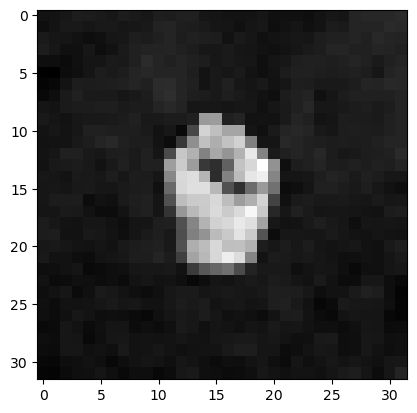

In [12]:
# train의 이미지 확인
plt.imshow(X_train[0], cmap='gray')
plt.show()

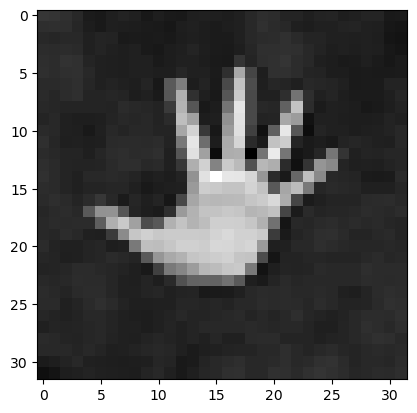

In [13]:
# test의 이미지 확인
plt.imshow(X_test[0], cmap='gray')
plt.show()

In [14]:
import numpy as np

# train data 만들기
tempData = np.zeros(18000 * 32 * 32, dtype=np.int32).reshape(18000, 32, 32)

i = 0
for image in X_train:
    img = np.array(image, dtype=np.int32)
    tempData[i,:,:] = img 
    i += 1

X_train = tempData.copy()
print(X_train.shape)

# test Data 만들기

tempData = np.zeros(3600 * 32 * 32, dtype=np.int32).reshape(3600, 32, 32)

i = 0
for image in X_test:
    img = np.array(image, dtype=np.int32)
    tempData[i,:,:] = img 
    i += 1

X_test = tempData.copy()
print(X_test.shape)



(18000, 32, 32)
(3600, 32, 32)


In [15]:
# Dictionary로 구성
label_to_int = {
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 6,
    '1L' : 7,
    '2L' : 8,
    '3L' : 9,
    '4L' : 10,
    '5L' : 11
}

In [16]:
# 숫자로 변경하기
temp = []
for label in y_train:
    temp.append(label_to_int[label])
y_train = temp.copy()

temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test = temp.copy()


In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
y_test[:5]

array([11, 11,  3, 11, 11])

In [19]:
X_train.shape

(18000, 32, 32)

In [20]:
# 정규화
train_scaled = X_train.reshape(-1,32,32,1) / 255.0


# train, valid
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = \
                            train_test_split(
                                train_scaled,
                                y_train,
                                test_size=0.2,
                                random_state=42
                            )

print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

(14400, 32, 32, 1) (3600, 32, 32, 1)
(14400,) (3600,)


In [21]:
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Dropout
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping

model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2))   
model.add(keras.layers.Flatten())

model.add(Dense(100, activation='relu' ))
model.add(Dropout(0.4))
model.add(Dense(12, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

cp = ModelCheckpoint("../Data/my0727_cnn_best.keras")
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target), callbacks=[cp,es])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,638,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,352 (6.26 MB)

 Trainable params: 1,640,352 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6779 - loss: 1.0566 - val_accuracy: 0.9897 - val_loss: 0.0456
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9758 - loss: 0.0905 - val_accuracy: 0.9967 - val_loss: 0.0103
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9885 - loss: 0.0400 - val_accuracy: 0.9997 - val_loss: 0.0029
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9992 - val_loss: 0.0016
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9951 - loss: 0.0166 - val_accuracy: 1.0000 - val_loss: 5.7532e-04
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 3.8410e-04
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9968 - loss: 0.0108 -

In [22]:
model = keras.models.load_model("../Data/my0727_cnn_best.keras")

In [23]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [24]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 64) (64,)


In [37]:
conv.weights[0]

<Variable path=conv2d/kernel, shape=(3, 3, 1, 64), dtype=float32, value=[[[[ 1.88868552e-01 -7.56148547e-02  4.54556830e-02  5.32627255e-02
    -1.27712667e-01  3.27208370e-01 -2.78431773e-01 -9.02527273e-02
    -7.91173354e-02  3.23694386e-02 -2.05742508e-01 -6.00629389e-01
     3.71816605e-01 -1.29274651e-01  9.13144462e-03 -7.29609057e-02
    -3.93523902e-01  3.24036270e-01 -2.19725817e-02  1.30119383e-01
     8.89805704e-02 -3.48739952e-01  3.52751225e-01 -1.34816691e-01
     1.11581437e-01 -4.23541784e-01  2.77605116e-01 -1.56791627e-01
     3.65010321e-01 -4.10692036e-01 -8.48812684e-02 -8.65913704e-02
     2.78270971e-02 -4.99387272e-02  1.00344025e-01 -2.97230095e-01
     4.83769059e-01 -3.20774503e-02 -3.59717086e-02 -1.89866289e-01
     8.87411386e-02 -1.54467016e-01  9.24448371e-02  3.63181591e-01
    -3.06170005e-02 -2.19928622e-02 -2.88855761e-01 -1.62860885e-01
     1.35357352e-02  3.13204564e-02  3.75413269e-01  2.60517508e-01
    -1.23455904e-01 -8.19505006e-02 -7.54702

In [41]:
import numpy as np
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

0.018409953 0.25071833


In [26]:
import matplotlib.pyplot as plt

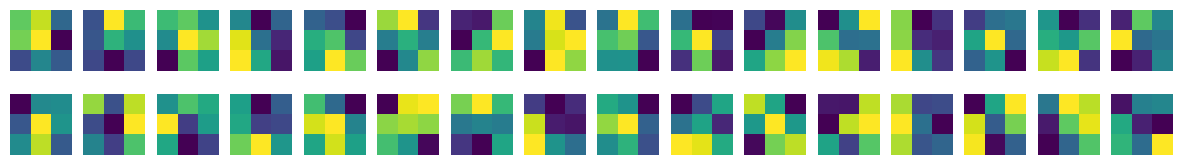

In [42]:
# 이미지로 확인하기
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')

plt.show()        

In [43]:
# 특성맵 시각화
model.layers[0].input

<KerasTensor shape=(None, 32, 32, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>

In [29]:
print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

(14400, 32, 32, 1) (3600, 32, 32, 1)
(14400,) (3600,)


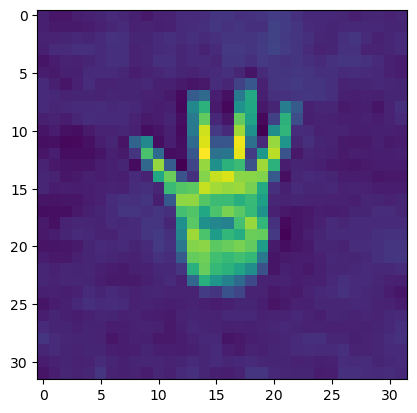

In [30]:
plt.imshow(train_scaled[0])
plt.show()

In [44]:
# model 불러오기
conv_acti = keras.models.Model(
    model.layers[0].input,
    model.layers[0].output
)

In [32]:
inputs = train_scaled[0:1].reshape(-1,32,32,1)/255.0
feature_map = conv_acti.predict(inputs)
print(feature_map.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 32, 32, 64)


In [50]:
print(np.array(feature_map[0]))

[-0. -0. -0. ... -0. -0. -0.]


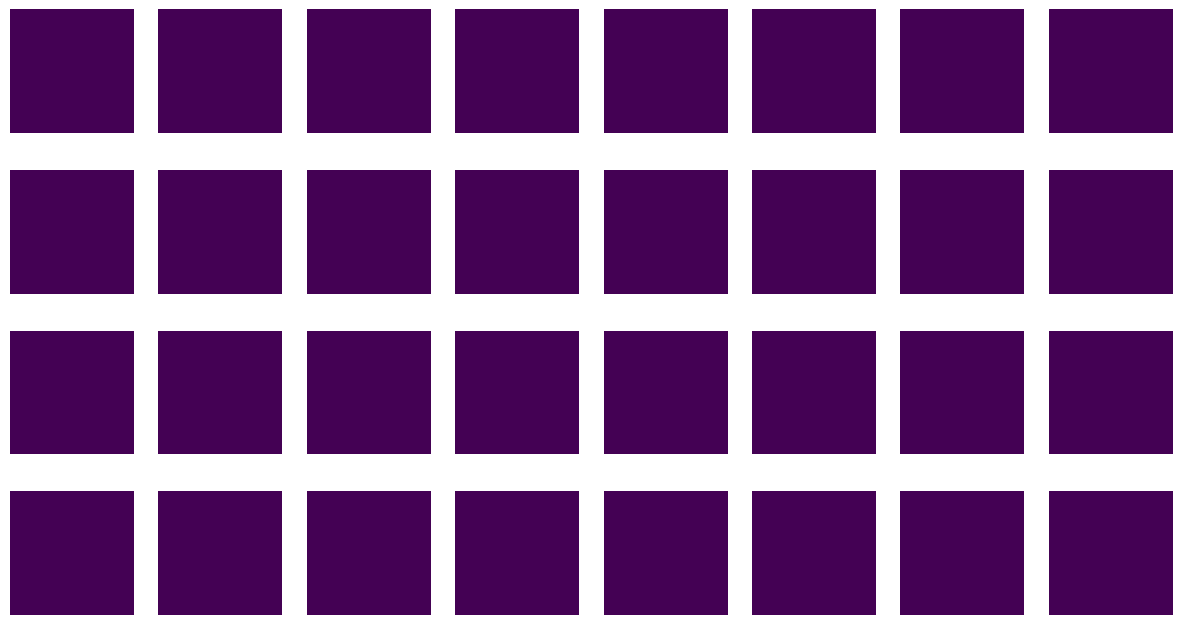

In [33]:
fig, axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()

In [34]:
# Max Pooling
conv2_acti = keras.models.Model(model.layers[0].input, model.layers[2].output)

In [35]:
feature_map =  conv2_acti.predict(inputs)
print(feature_map.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(1, 16384)
